# Análisis por discriminación lineal (LDA)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### Datos

Supongamos que tenemos dos distribuciones normales multivariadas. Es decir, cada distribución tiene media 0. Y cada distribución tiene 5000 muestras.

In [ ]:
mu0 = [0, 0] #vector de medias, siempre se puede asumir como 0,0
sigma0 = np.array([[1, 0.5], [0.5, 1]]) #es bilineal
sigma1 = np.array([[1, 0.5], [0.5, 1]]) #simétrica y positiva definida

X = np.random.multivariate_normal(mu0, sigma0, 5000)
X

array([[-1.96933247,  0.80292987],
       [-0.74732184, -0.91035389],
       [ 0.32494303,  0.37958563],
       ...,
       [-0.87662022, -1.92674524],
       [-0.30504973, -1.03372377],
       [ 1.92392191,  0.90069768]])

In [ ]:
X[2000:, 0] = X[2000:, 0] + 2
X[2000:, 1] = X[2000:, 1] + 2

In [ ]:
y = np.ones((5000,))
y[:2000] = 0

In [ ]:
X[:6, :], y[:6]

(array([[-1.96933247,  0.80292987],
        [-0.74732184, -0.91035389],
        [ 0.32494303,  0.37958563],
        [-0.68243132, -1.10170454],
        [-0.80896901, -1.30033705],
        [-1.51132088, -0.28700614]]),
 array([0., 0., 0., 0., 0., 0.]))

### Visualización

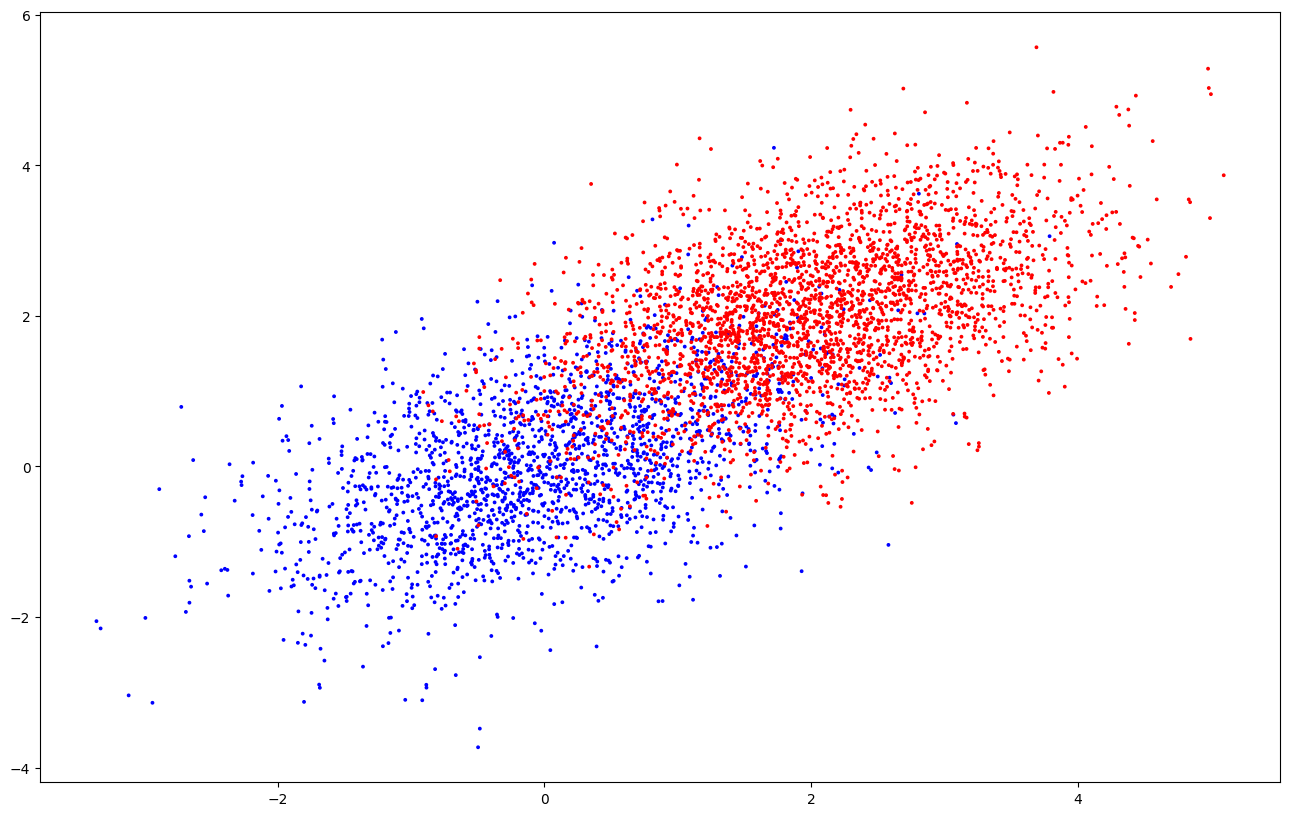

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
plt.scatter(X[:, 0], X[:, 1], s=3, c=list(map(lambda x:'blue' if x==0 else 'red', y)))
plt.show()

### Regla de Clasificación

Tenemos que:

$$ f(x \vert y) = \frac{1}{\vert 2 \pi \Sigma \vert^{\frac{1}{2}}} \text{exp} \big( -\frac{1}{2} (x - \mu)^T (\Sigma)^{-1} (x - \mu)\big) $$

En el caso de clasificación binaria (como el caso anterior), podemos expresar los dos tipos de casos de probabilidad condicional que $y=0$ y $y=1$.

$$ f(x \vert y=0) = \frac{1}{\vert 2 \pi \Sigma^{(0)} \vert^{\frac{1}{2}}} \text{exp} \big( -\frac{1}{2} (x - \mu^{(0)})^T (\Sigma^{(0)})^{-1} (x - \mu^{(0)})\big)\\
f(x \vert y=1) = \frac{1}{\vert 2 \pi \Sigma^{(1)} \vert^{\frac{1}{2}}} \text{exp} \big( -\frac{1}{2} (x - \mu^{(1)})^T (\Sigma^{(1)})^{-1} (x - \mu^{(1)})\big) $$


In [ ]:
mu0 = np.array([[0], [0]])
mu1 = np.array([[2], [2]])

def f_x_y_0(x):
    const = 1 / (2 * np.pi * np.power(np.linalg.det(sigma0), 1/2))
    return const * np.exp(-0.5 * (x - mu0).T @ np.linalg.inv(sigma0) @ (x - mu0))[0, 0]

def f_x_y_1(x):
    const = 1 / (2 * np.pi * np.power(np.linalg.det(sigma1), 1/2))
    return const * np.exp(-0.5 * (x - mu1).T @ np.linalg.inv(sigma1) @ (x - mu1))[0, 0]

In [ ]:
f_x_y_0(np.array([[0.5], [0.5]]))

0.1555632781262252

In [ ]:
f_x_y_1(np.array([[0.5], [0.5]]))

0.041006034909973794

Media muestral y covarianza muestral.

In [ ]:
mu0_hat = np.mean(X[:2000, :], axis=0)
sigma0_hat = np.cov(X[:2000, :].T)
mu0_hat, sigma0_hat

(array([0.02162168, 0.05167703]),
 array([[1.00601991, 0.50413685],
        [0.50413685, 1.00370203]]))

In [ ]:
mu1_hat = np.mean(X[2000:, :], axis=0)
sigma1_hat = np.cov(X[2000:, :].T)
mu1_hat, sigma1_hat

(array([2.01362268, 2.03731606]),
 array([[1.02233155, 0.50634455],
        [0.50634455, 0.98840586]]))

In [ ]:
def fhat_x_y_0(x):
    const = 1 / (2 * np.pi * np.power(np.linalg.det(sigma0_hat), 1/2))
    return const * np.exp(-0.5 * (x - mu0_hat).T @ np.linalg.inv(sigma0_hat) @ (x - mu0_hat))[0, 0]

def fhat_x_y_1(x):
    const = 1 / (2 * np.pi * np.power(np.linalg.det(sigma1_hat), 1/2))
    return const * np.exp(-0.5 * (x - mu1_hat).T @ np.linalg.inv(sigma1_hat) @ (x - mu1_hat))[0, 0]

In [ ]:
fhat_x_y_0(np.array([[0.5], [0.5]]))

0.15733098780979146

In [ ]:
fhat_x_y_1(np.array([[0.5], [0.5]]))

0.04024093416343806

De hecho, ya conocemos la distribución de la etiqueta. Usando esto, podemos calcular la probabilidad de Bayes. La fórmula de la regla de Bayes es la siguiente:

$$ P(Y = y \vert X = x) = \frac{f(x \vert Y = y)P(Y = y)}{f(x \vert y = 0) P(Y = 0) + f(x \vert y=1)P(Y=1)} $$

In [ ]:
p0 = 2000/5000
p1 = 1 - p0

def bayes_prob(x, y):
    if y == 1:
        return f_x_y_1(x) * p1 / (f_x_y_0(x) * p0 + f_x_y_1(x) * p1)
    else:
        return f_x_y_0(x) * p0 / (f_x_y_0(x) * p0 + f_x_y_1(x) * p1)

In [ ]:
bayes_prob(np.array([[0.5], [0.5]]), 0)

0.7166425945408171

In [ ]:
bayes_prob(np.array([[0.5], [0.5]]), 1)

0.2833574054591828

Also, we can estimate it with our hypothesis.

In [ ]:
p0_hat = 2000 / 5000
p1_hat = 3000 / 5000

def bayes_prob_hat(x, y):
    if y == 1:
        return fhat_x_y_1(x) * p1_hat / (fhat_x_y_0(x) * p0_hat + fhat_x_y_1(x) * p1_hat)
    else:
        return fhat_x_y_0(x) * p0_hat / (fhat_x_y_0(x) * p0_hat + fhat_x_y_1(x) * p1_hat)

bayes_prob_hat(np.array([[0.5], [0.5]]), 0), bayes_prob_hat(np.array([[0.5], [0.5]]), 1)

(0.7227215820121252, 0.27727841798787484)

Se confirma que el dato (`[0.5], [0.5]`) se clsifica con la etiqueta `0`.

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=1, solver='svd', store_covariance=True).fit(X, y)

In [ ]:
lda.means_

array([[0.02162168, 0.05167703],
       [2.01362268, 2.03731606]])

In [ ]:
mu0 = lda.means_[0, :]
mu1 = lda.means_[1, :]
lda_cov = lda.covariance_

mu0, mu1, lda_cov

(array([0.02162168, 0.05167703]),
 array([2.01362268, 2.03731606]),
 array([[1.01540122, 0.50525937],
        [0.50525937, 0.99412591]]))

Usando un discriminador entrenado, podemos calcular la probabilidad de cada etiqueta. Para hacer esto, necesitamos implementar la función delta para expresarlo.
La fórmula de la función delta es así.

$$ \delta_k(x) = x^T \Sigma^{-1} \mu_k - \frac{1}{2} \mu^T_k \Sigma^{-1} \mu_k + \log \pi_k $$



In [ ]:
def discriminator(x):
    d0 = x.T @ np.linalg.inv(lda_cov) @ mu0 - 0.5 * mu0.T @ np.linalg.inv(lda_cov) @ mu0 + np.log(p0)
    d1 = x.T @ np.linalg.inv(lda_cov) @ mu1 - 0.5 * mu1.T @ np.linalg.inv(lda_cov) @ mu1 + np.log(p1)
    return [d0[0], d1[0]]

In [ ]:
discriminator(np.array([[0.5], [0.5]]))

[-0.8931617475151694, -1.8873362569523098]

In [ ]:
np.argmax(discriminator(np.array([[0.5], [0.5]])))

0

¿Qué pasa con la precisión del modelo LDA ajustado?

In [ ]:
y_hat = np.apply_along_axis(lambda x: np.argmax(discriminator(np.reshape(x, (2, 1)))), 1, X)

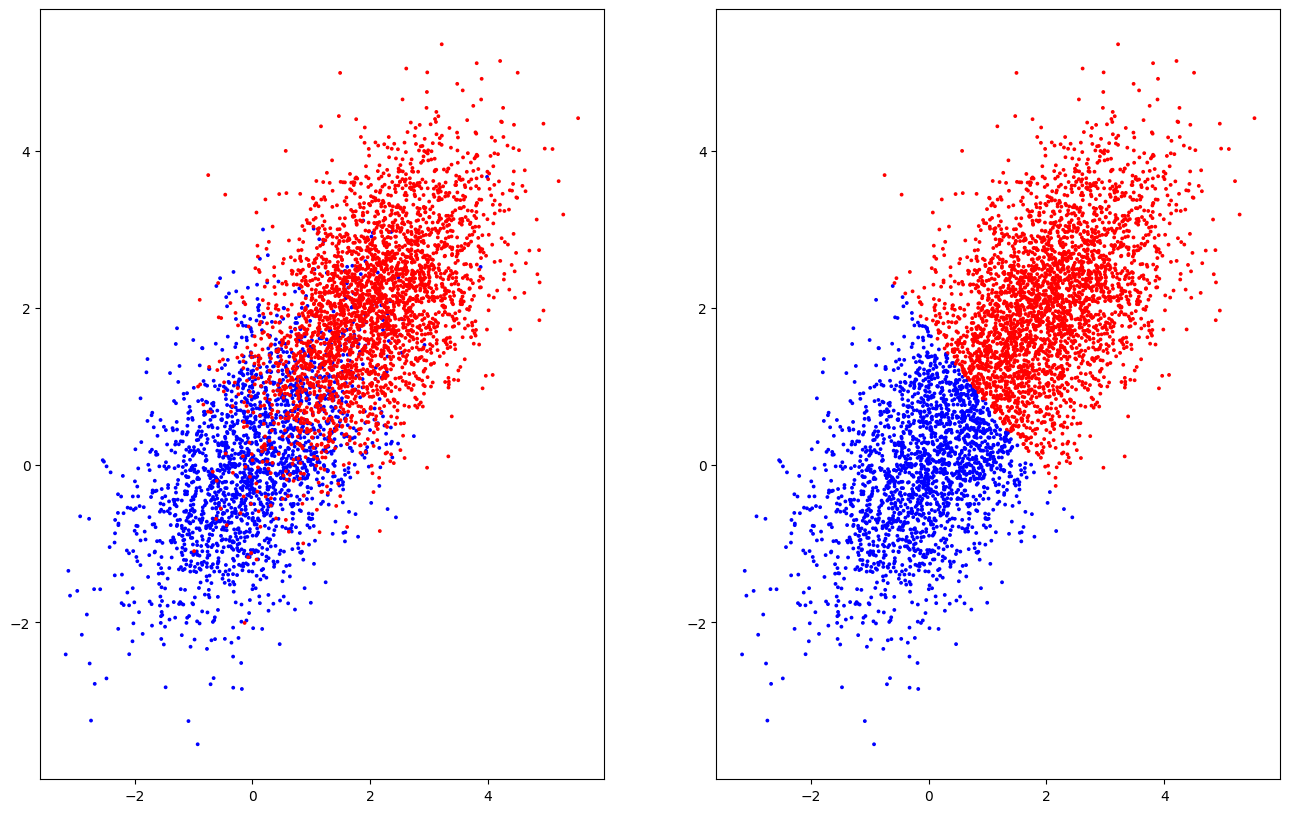

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 10))
ax[0].scatter(X[:, 0], X[:, 1], s=3, c=list(map(lambda x:'blue' if x==0 else 'red', y)))
ax[1].scatter(X[:, 0], X[:, 1], s=3, c=list(map(lambda x:'blue' if x==0 else 'red', y_hat)))
plt.show()

In [ ]:
(y == y_hat).mean()

0.8772

### Segregaciòn de datos

In [ ]:
import numpy as np

diccionario ={"M1": np.random.binomial(1000, 0.3, 100),
              "M2": np.random.binomial(1000, 0.6, 100),
              "M3": np.random.binomial(1000, 0.4, 100),
              "M4": np.random.binomial(1000, 0.8, 100)}

In [ ]:
import pandas as pd

np.random.seed(1)

df = pd.DataFrame(diccionario)
df

,M1,M2,M3,M4
0,297,618,388,803
1,291,606,404,803
2,304,614,401,803
3,298,579,413,820
4,302,606,417,806
...,...,...,...,...
95,283,585,416,806
96,288,576,397,804
97,300,596,418,812
98,304,658,407,800


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   M1      100 non-null    int64
 1   M2      100 non-null    int64
 2   M3      100 non-null    int64
 3   M4      100 non-null    int64
dtypes: int64(4)
memory usage: 3.2 KB


In [ ]:
## Escoger columnas

df['M1']

0     297
1     291
2     304
3     298
4     302
     ... 
95    283
96    288
97    300
98    304
99    304
Name: M1, Length: 100, dtype: int64

In [ ]:
np.mean(df['M1'])

297.52

In [ ]:
np.var(df['M1'], ddof = 1)

214.9591919191918

In [ ]:
type(df["M1"])

pandas.core.series.Series

In [ ]:
# Vamos a seleccionar M1 y M2

df[["M1", "M2"]]

,M1,M2
0,297,618
1,291,606
2,304,614
3,298,579
4,302,606
...,...,...
95,283,585
96,288,576
97,300,596
98,304,658


In [ ]:
df

,M1,M2,M3,M4
0,297,618,388,803
1,291,606,404,803
2,304,614,401,803
3,298,579,413,820
4,302,606,417,806
...,...,...,...,...
95,283,585,416,806
96,288,576,397,804
97,300,596,418,812
98,304,658,407,800


In [ ]:
df.iloc[99].mean()

529.75

In [ ]:
df.ndim

2

In [ ]:
df.mean(0)

M1    297.52
M2    600.26
M3    401.39
M4    800.74
dtype: float64

In [ ]:
df.mean(1)

0     526.50
1     526.00
2     530.50
3     527.50
4     532.75
       ...  
95    522.50
96    516.25
97    531.50
98    542.25
99    529.75
Length: 100, dtype: float64

In [ ]:
df[0::51]

,M1,M2,M3,M4
0,297,618,388,803
51,300,604,404,793


In [ ]:
 #Filtrar
 df2 = df[(df['M1'] > 300)]
 df2

,M1,M2,M3,M4
2,304,614,401,803
4,302,606,417,806
8,302,613,427,801
11,303,605,415,813
16,331,585,418,810
19,324,609,426,802
20,309,578,402,801
22,301,601,445,816
23,320,597,434,791
24,320,600,416,795


In [ ]:
df2.shape

(100, 4)